# Evaluation Report

**Link to Jupyter Notebook**: https://github.com/CMU-313/spring23-nodebb-team-chi/blob/career-model-integration/career_model/Evaluation%20Report.ipynb

## 1. Introduction (< 0.5 page)

The model is a machine learning model for predicting whether a student applicant would be a good employee. The model uses random forest classifier as the predictor.

The dataset we use to test the model is https://cmu-313.github.io/assets/project/student_data.csv. This dataset contains 500 student data, with information on Student ID, Gender, Age, Major, GPA, Extra Curricular, Num Programming Languages, Num Past Internships, and whether the student is a good application candidate.

This model is used on NodeBB, an open-source community forum software project. This model is connected with the career page within NodeBB. Students can go to the careers page to find job opportunities and provide their information. At the sametime, recruiters can use this feature to view a prediction of a student applicant's likeliness to be a good employee to hire. 

## 2. Description of the test data (< 1 page)


In [4]:
# Install a pip package in the current Jupyter kernel

import pandas as pd
import joblib
from pydantic import BaseModel, Field
from pydantic.tools import parse_obj_as

test_dataset = pd.read_csv("https://cmu-313.github.io/assets/project/student_data.csv")
clf = joblib.load('./model.pkl')

test_dataset.describe()

,Student ID,Age,GPA,Num Programming Languages,Num Past Internships,Good Candidate
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,249.500000,20.944000,2.905780,3.04600,2.052000,0.474000
std,144.481833,1.455025,0.839559,1.36073,1.407572,0.499824
min,0.000000,18.000000,0.000000,1.00000,0.000000,0.000000
25%,124.750000,20.000000,2.345000,2.00000,1.000000,0.000000
50%,249.500000,21.000000,2.990000,3.00000,2.000000,0.000000
75%,374.250000,22.000000,3.560000,4.00000,3.000000,1.000000
max,499.000000,25.000000,4.000000,5.00000,4.000000,1.000000


In [14]:
from statistics import mode
print("Mode of age is % s" % (mode(test_dataset['Age'])))
print("Mode of GPA is % s" % (mode(test_dataset['GPA'])))
print("Mode of Num Programming Languages is % s" % (mode(test_dataset['Num Programming Languages'])))
print("Mode of Num Past Internships is % s" % (mode(test_dataset['Num Past Internships'])))


Mode of age is 21
Mode of GPA is 4.0
Mode of Num Programming Languages is 3
Mode of Num Past Internships is 2


### Discussion on the distribution of the features:

**Student ID**: This is a unique identifier for each student in the dataset, ranging from 0 to 499.

**Gender**: This is a discrete variable representing the gender of each student. Looking at the histogram, we can see that the number of femail student is approximately qual to that of male student. There are slightly more female students than male students in the dataset.

**Age**: This is a continuous variable representing the age of each student in years. The mean age is 20.944, with a standard deviation of 1.455. The minimum age in the dataset is 18, and the maximum age is 25. The median age is 21, and the mode is 21. This means most of the students in the dataset aged around 21.

**GPA**: This is a continuous variable representing the grade point average for each student. The mean GPA is 2.906, with a standard deviation of 0.840. The minimum GPA is 0, and the maximum GPA is 4. The median GPA is 2.99, and the mode is 4.0.

**Num Programming Languages**: This is a discrete variable representing the number of programming languages that each student can use. The mean value is 3.046, with a standard deviation of 1.361. The minimum value is 1, and the maximum value is 5. The median value is 3, and the mode is 3.

**Num Past Internships**: This is a discrete variable representing the number of past internships that each student has completed. The mean value is 2.052, with a standard deviation of 1.408. The minimum value is 0, and the maximum value is 4. The median value is 2, and the mode is 2.

**Good Candidate**: This is a binary variable indicating whether or not each student is considered a good candidate for a job. The mean value is 0.474, indicating that slightly less than half of the students in the dataset are considered good candidates(labeled 1).

**Major**: This is a categorical variable indicating the major of each student, it has values such as Math, Computer Science, Electrical and Computer Engineering, Business, Information Systems, and Statistics and Machine Learning. The major with most students is Math.

**Extra Curricular**: This is a categorical variable indicating the extra curricular organizations, it has values such as Sorority, Fraternity, Teaching Assistant, Sports and academic clubs. The extracurricular activity with most students is Student Theatre.

## 3. Model Performance (< 0.5 page)

In [2]:
feature_cols = ['Student ID', 'Gender', 'Age', 'Major', 'GPA', 'Extra Curricular',
       'Num Programming Languages', 'Num Past Internships']
y_pred = clf.predict(test_dataset[feature_cols])
y_pred = pd.Series(y_pred)
y = test_dataset['Good Candidate']


print(f"Test accuracy is {(y==y_pred).sum()/y.size:.4f}")

Test accuracy is 0.8320


Matplotlib created a temporary config/cache directory at /var/folders/c7/r0nx2srx14x1wcqf_7w83jvm0000gq/T/matplotlib-mownoify because the default path (/Users/chen/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


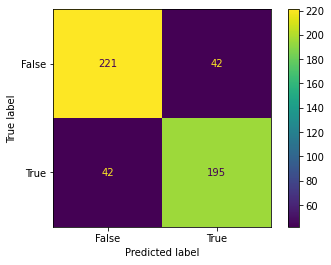

In [3]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

The model has a test accuracy of 0.8320, which means it correctly predicted the class labels for 83.20% of the test instances. However, the confusion matrix indicates that the model correctly classified 221 instances as class 0 and 195 instances as class 1. However, it incorrectly classified 42 instances of class 1 as class 0 (false negatives) and 42 instances of class 0 as class 1 (false positives).

## 4. Feature Exploration (< 1 page)

### Gender
It is important to consider the "Gender" feature when examining the fairness of your ML model because gender is a protected attribute, which means it is illegal to discriminate based on gender in many countries. If the ML model is trained on data that includes gender as a feature and it exhibits biases towards one gender, it may result in discriminatory outcomes and adversely affect the opportunities and outcomes for certain groups of applicants.

For example, if the model tends to predict more female applicants as "applicants are less likely to succeed in industry" (i.e. outputting 0 for more female applicants than for male applicants), this could lead to lower numbers of female applicants being selected for positions, which could lead to a lack of diversity in the industry. This would be unfair and potentially illegal, as it could result in gender-based discrimination. Therefore, it is important to carefully consider the inclusion of gender as a feature in the model and to test for any biases that may exist.

In the **Description of Test Data** section, we see that there are approximately equal number of female students and male students in the dataset. This indicates that the dataset is balanced with respect to gender. This means that there is an equal representation of both genders in the dataset and the dataset is not skewed towards one gender or the other. This can make it easier to identify any disparities or biases that may exist in the model's performance for male and female applicants and take steps to address them. However, just because the test dataset is balanced with respect to gender, it does not necessarily mean that the model is fair. Therefore, it's important to evaluate the model's fairness using appropriate fairness metrics, such as demographic parity or equal opportunity. These metrics can help the team to determine whether the model is equally effective for all groups in the dataset, regardless of their gender.

### Number of Programming Language
It's important to consider the potential biases that may exist if "number of programming languages" is included as a feature. If the dataset used to train the model is biased towards individuals who have had access to high-quality computer science education or have had the opportunity to learn multiple programming languages, this could result in a biased model that excludes individuals who have not had those same opportunities. Since the model is predicting whether an individual is likely to succeed in industry, not specific field (i.e. technical positions), disadvantaging individuals based on number of programming languages would be unfair and could lead to a lack of diversity in the selected applicants.

Additionally, there may be correlation between the number of programming languages an applicant knows and other protected attributes such as race, gender, or socioeconomic status. If this is the case, then a model that is biased towards "number of programming languages" as a feature could result in discrimination against certain groups. By examining the fairness of the model with respect to number of programming languages, we can ensure that the model is providing equal opportunities to individuals across all fields of study and is not creating unintended biases or barriers for certain groups.

In the **Description of Test Data** section, we see that there are approximately equal number of students for each of the number of programming languages known. This indicates that the dataset is balanced with respect to number of programming language. The fact that the dataset is balanced with respect to the number of programming languages known by the students suggests that the model should be equally accurate in predicting success regardless of the number of programming languages known. We can use fairness evaluation strategies on Num of Programming Language to assess the fairness of the model.

## 5. Fairness Evaluation (~ 1.5 page)

In [3]:
df_pred = pd.Series(y_pred, name='Predicted Good Candidate').to_frame()

df_pred

,Predicted Good Candidate
0,0
1,1
2,0
3,1
4,0
...,...
495,0
496,1
497,0
498,1


In [4]:
df = test_dataset.join(df_pred)

df

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate,Predicted Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0,1
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0,1
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...
495,495,M,20,Computer Science,2.89,Student Government,5,0,0,0
496,496,F,24,Computer Science,2.53,Buggy,3,2,1,1
497,497,F,21,Computer Science,2.00,Sorority,3,2,0,0
498,498,M,22,Electrical and Computer Engineering,3.24,Men's Basketball,4,1,1,1


#### Demographic Parity on Gender

In [5]:
total_count_males = len(df[df['Gender'] == 'M'])
total_count_females = len(df[df['Gender'] == 'F'])

positive_males = len(df[(df['Predicted Good Candidate'] == 1)&(df['Gender'] == 'M')])
positive_females = len(df[(df['Predicted Good Candidate'] == 1)&(df['Gender'] == 'F')])

print('Positive Rate for Males: ', positive_males/total_count_males)
print('Positive Rate for Females: ', positive_females/total_count_females)

Positive Rate for Males:  0.6160337552742616
Positive Rate for Females:  0.34600760456273766


As shown by the large disparity in the positive rate between male and female students, the model is not fair when considering this fairness matric. The positive rate for males is 78% more accurate than for females. This demonstrates that the model has a far higher chance of making an accurate prediction when the student in question is male which is unfair to female students.

#### Equal Opportunity on Gender

In [8]:
# total_count_males = len(df[df['Gender'] == 'M'])
# total_count_females = len(df[df['Gender'] == 'F'])

true_positive_males = len(df[(df['Good Candidate'] == 1)&(df['Predicted Good Candidate'] == 1)&(df['Gender'] == 'M')])
false_negative_males = len(df[(df['Good Candidate'] == 1)&(df['Predicted Good Candidate'] == 0)&(df['Gender'] == 'M')])

true_positive_females = len(df[(df['Good Candidate'] == 1)&(df['Predicted Good Candidate'] == 1)&(df['Gender'] == 'F')])
false_negative_females = len(df[(df['Good Candidate'] == 1)&(df['Predicted Good Candidate'] == 0)&(df['Gender'] == 'F')])

print('True Positive Rate Males: ', (true_positive_males)/(true_positive_males + false_negative_males))
print('True Positive Rate Females: ', (true_positive_females)/(true_positive_females + false_negative_females))

True Positive Rate Males:  0.9137931034482759
True Positive Rate Females:  0.7355371900826446


When using the equal oppertunity strategy to evaluate fairness based on the gender feature, the model is again unfair. Essentially, there is yet another sign that this model discriminizes based on gender since there is almost an 18% gap between the true positive rates between male and female students.

#### Group Aware on Number of Programming Languages 

In [7]:
true_positive_predictions = len(df.loc[(df['Good Candidate'] == 1) & (df['Predicted Good Candidate'] == 1)])
false_negative_predictions = len(df.loc[(df['Good Candidate'] == 1) & (df['Predicted Good Candidate'] == 0)])

print('True Positive Rate for Group Aware of Number of Programming Languages: ', (true_positive_predictions)/(true_positive_predictions + false_negative_predictions))

True Positive Rate for Group Aware of Number of Programming Languages:  0.8227848101265823


While the true positive rate for the number of programming langauges group aware model is pretty good at 82.3%, there is a possibility that if the model was trained without the number of programming languages as a a feature (i.e., group unaware), the true positive rate might be decreased by a statistically significant amount (5% or more). The team specifically chose the number of programming languages to evaluate the fairness of the model since we believe that this does not specifically have a significant impact on whether a candidate is good for the job or not. This feature does not take into account how well the student knows each language nor if the students knows the lnaguages used in the position they are applying for. Thus, this leads us to conclude that the group aware model may have a relatively high accuracy because it is aware of this feature even though this feature is not necessarily a fair way to assess the quality of a candidate.

#### Fairness Strategy Most Appropriate for Model

We believe that the most appropriate strategy for assessing the fairness of the model is using the Equal Opportunity evaluation strategy. This is due to the fact that both male and female students should be given an equal opportunity to be considered good candidates in the internship/job application process. As mentioned previously, this model is more accurately predicts good candidates that are male compared to female students. Since universities like CMU have a 50/50 split between male and female students, it would make sense both morally and statistially that each of those two groups are given a fair chance, relative to the other group, to be considered good candidates when applying to jobs/internships. This is not the case with this model in its current form since it is significantly more accurate when predicting good male candidates compared to predicting good female candidates.

## 6. Recommendation (< 0.5 page)
Since the data shows that the model is potentially biased with respect to gender and number of programming languages, it is important to address these biases before deploying the model in a real-world setting. Failing to do so could result in discriminatory outcomes that unfairly disadvantage certain groups and harm their opportunities for success. 

Essentially, the model discriminates against female students as it significantly more accurately predicts good male candidates than good female candidates. In the real world, this could potentially lead to good female students getting rejected from moving further in the application process for internships and jobs which could have a negative impact on the industry as a whole and undo decades of work to normalize workplace opportunities across the two genders.

Additionally, there is a significant possibility that the model discriminates against those with fewer programming languages on their resume compared to students with many more. Thus, this model could potentially reject students that have excellent coding skills even though they do not put all of the programming languages they know on their resume since they only put the ones that they know well. Whereas other students may put many more languages, even though they have relatively little experience with some of them. 

To conclude, we do not recommend using this model in production in its current state. It needs significant rework and retraining in order to ensure that the current gender and number of programming language biases are eliminated before it is used in production to predict something as important as whether a student is a good internship/job candidate or not.
